# Sales Analysis

## Import Necesary Libraries

In [77]:
import pandas as pd
import os
import matplotlib.pyplot as plt

 ## Task #1 :Merge 12 months of sales data into a single file

In [24]:
files =[file for file in os.listdir('./SalesAnalysis/Sales_Data')]
all_months_data= pd.DataFrame()
for file in files:
    df = pd.read_csv('./SalesAnalysis/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv",index=False)

### Read in updated dataframe

In [25]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up tha data

#### Drop rows of NAN

In [38]:
nan_df = all_data[all_data.isna().any(axis=1)]

In [45]:
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Find 'Or' and delete it

In [51]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to the correct type

In [55]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int32')

In [57]:
all_data['Price Each']=all_data['Price Each'].astype('float')

## Task #2 : Add Month Column

In [59]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Task #3 : Add sales column

In [75]:
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Task #4 : Add city column

In [109]:
def get_city(address):
    return address.split(',')[1]

def get_state(state):
    return f"({state.split(',')[2][0:3]})"

def get_full_location(location):
    return get_city(location)+get_state(location)

all_data['City']=all_data['Purchase Address'].apply(lambda x:get_full_location(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas( TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston( MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles( CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles( CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles( CA)


## Task #5 : Add hour and minutes columns

In [122]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [124]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [126]:
all_data['Minute'] = all_data['Order Date'].dt.minute

In [127]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas( TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston( MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles( CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles( CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles( CA),9,27


### Question 1: What was the best moth for sales? How much was earned that month?

In [79]:
results = all_data.groupby('Month').sum()

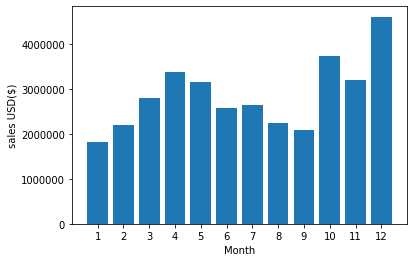

In [85]:
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('sales USD($)')
plt.xlabel('Month')
plt.show()

   ### Question 2 : What city haf the highest number of sales

In [112]:
results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta( GA),16602,2.779908e+06,104794,2.795499e+06
Austin( TX),11153,1.809874e+06,69829,1.819582e+06
Boston( MA),22528,3.637410e+06,141112,3.661642e+06
Dallas( TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles( CA),33289,5.421435e+06,208325,5.452571e+06
New York City( NY),27932,4.635371e+06,175741,4.664317e+06
Portland( ME),2750,4.471893e+05,17144,4.497583e+05
Portland( OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco( CA),50239,8.211462e+06,315520,8.262204e+06


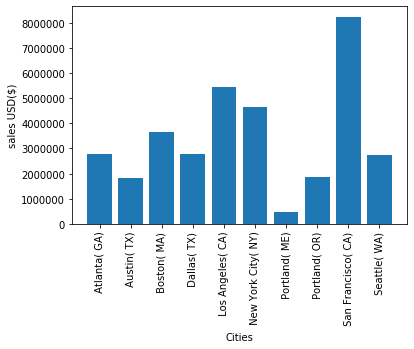

In [121]:
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation="vertical")
plt.ylabel('sales USD($)')
plt.xlabel('Cities')
plt.show()

   ### Question 3 : What time should we display advertisements to maximize likelihood of customer's buying product?

In [139]:
hours = [hour for hour, df in all_data.groupby('Hour')]

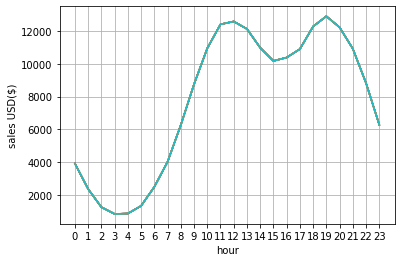

In [148]:
plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours)
plt.ylabel('sales USD($)')
plt.xlabel('hour')
plt.grid()
plt.show()